In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos la clase (se mantiene igual)
class NeuralNetwork:
    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_derivada
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_derivada

        # inicializo los pesos
        self.weights = []
        self.deltas = []
        # capas = [4,3,5] - 4 entradas, 3 ocultas, 5 salidas
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2*np.random.random((layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)

        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)

            deltas.reverse()

            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: print('epochs:', k)

    def predict(self, x):
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

    def print_weights(self):
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
            print(self.weights[i])

    def get_weights(self):
        return self.weights

    def get_deltas(self):
        return self.deltas

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivada(x):
    return 1.0 - x**2

def valNN(x):
    return (int)(abs(round(x)))

=== ENTRENAMIENTO MIEMBRO 1 ===
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000

=== RESULTADOS MIEMBRO 1 ===
Entrada: [-1  0 -1 -1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [-1  0  1 -1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [-1  0 -1  1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [-1  0  1  1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [-1  1 -1 -1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [-1 -1 -1 -1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [ 0 -1 -1  1] -> Esperado: [0 1 0 1 1] | Obtenido: [0, 1, 0, 1, 1]
Entrada: [ 0 -1  1  1] -> Esperado: [0 1 0 1 1] | Obtenido: [0, 1, 0, 1, 1]
Entrada: [ 0  1 -1  1] -> Esperado: [1 0 1 0 1] | Obtenido: [1, 0, 1, 0, 1]
Entrada: [0 1 1 1] -> Esperado: [1 0 1 0 1] | Obtenido: [1, 0, 1, 0, 1]
Entrada: [ 0  0 -1  1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [0 0 1 1] -> Esperado: [1 0 0 1

Text(0.5, 1.0, 'Miembro 1 - Coste vs Epochs')

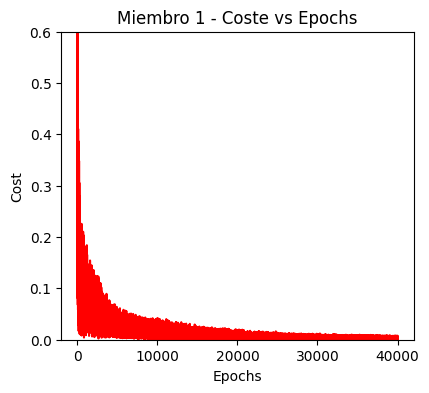

In [ ]:
# Red Coche Mejorada
# 4 entradas: [Distancia, Posición, Peso, Línea]
# 5 salidas: [Motor1, Motor2, Motor3, Motor4, LED]

nn1 = NeuralNetwork([4, 6, 5], activation='tanh')

# Entradas: [Distancia, Posición, Peso, Línea]
X1 = np.array([
    # Sin obstáculos, diferentes estados de peso y línea
    [-1, 0, -1, -1],   # sin obstaculos, sin peso, sin línea
    [-1, 0, 1, -1],    # sin obstaculos, con peso, sin línea
    [-1, 0, -1, 1],    # sin obstaculos, sin peso, con línea
    [-1, 0, 1, 1],     # sin obstaculos, con peso, con línea

    [-1, 1, -1, -1],   # sin obstaculos derecha
    [-1, -1, -1, -1],  # sin obstaculos izquierda

    # Obstáculos detectados
    [0, -1, -1, 1],    # obstaculo derecha, sin peso, con línea
    [0, -1, 1, 1],     # obstaculo derecha, con peso, con línea
    [0, 1, -1, 1],     # obstaculo izquierda, sin peso, con línea
    [0, 1, 1, 1],      # obstaculo izquierda, con peso, con línea
    [0, 0, -1, 1],     # obstaculo centro, sin peso, con línea
    [0, 0, 1, 1],      # obstaculo centro, con peso, con línea

    # Demasiado cerca
    [1, 1, -1, -1],    # demasiado cerca derecha
    [1, -1, -1, -1],   # demasiado cerca izquierda
    [1, 0, -1, -1],    # demasiado cerca centro
    [1, 1, 1, -1],     # demasiado cerca derecha con peso
    [1, 0, 1, -1]      # demasiado cerca centro con peso
])

# Salidas: [Motor1, Motor2, Motor3, Motor4, LED]
# LED se enciende (1) cuando hay peso (1) o cuando sigue línea (1)
y1 = np.array([
    [1,0,0,1, 0],  # avanzar, LED apagado
    [1,0,0,1, 1],  # avanzar, LED encendido (peso)
    [1,0,0,1, 1],  # avanzar, LED encendido (línea)
    [1,0,0,1, 1],  # avanzar, LED encendido (ambos)

    [1,0,0,1, 0],  # avanzar
    [1,0,0,1, 0],  # avanzar

    [0,1,0,1, 1],  # giro derecha, LED línea
    [0,1,0,1, 1],  # giro derecha, LED ambos
    [1,0,1,0, 1],  # giro izquierda, LED línea
    [1,0,1,0, 1],  # giro izquierda, LED ambos
    [1,0,0,1, 1],  # avanzar, LED línea
    [1,0,0,1, 1],  # avanzar, LED ambos

    [0,1,1,0, 0],  # retroceder
    [0,1,1,0, 0],  # retroceder
    [0,1,1,0, 0],  # retroceder
    [0,1,1,0, 1],  # retroceder con LED peso
    [0,1,1,0, 1]   # retroceder con LED peso
])

print("=== ENTRENAMIENTO MIEMBRO 1 ===")
nn1.fit(X1, y1, learning_rate=0.03, epochs=40001)

print("\n=== RESULTADOS MIEMBRO 1 ===")
index = 0
for e in X1:
    prediccion = nn1.predict(e)
    print(f"Entrada: {e} -> Esperado: {y1[index]} | Obtenido: {[valNN(p) for p in prediccion]}")
    index += 1

# Gráfica de coste
deltas1 = nn1.get_deltas()
valores1 = []
for arreglo in deltas1:
    valores1.append(np.mean(np.abs(arreglo[1])))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(valores1)), valores1, color='r')
plt.ylim([0, 0.6])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Miembro 1 - Coste vs Epochs')


=== ENTRENAMIENTO MIEMBRO 2 ===
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000

=== RESULTADOS MIEMBRO 2 ===
Entrada: [-1  0 -1  1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [-1  0  1  1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [-1  1 -1  1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [-1 -1 -1  1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [-1  0 -1 -1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [-1  0  1 -1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [ 0 -1 -1  1] -> Esperado: [0 1 0 1 0] | Obtenido: [0, 1, 0, 1, 0]
Entrada: [ 0 -1  1  1] -> Esperado: [0 1 0 1 1] | Obtenido: [0, 1, 0, 1, 1]
Entrada: [ 0  1 -1  1] -> Esperado: [1 0 1 0 0] | Obtenido: [1, 0, 1, 0, 0]
Entrada: [0 1 1 1] -> Esperado: [1 0 1 0 1] | Obtenido: [1, 0, 1, 0, 1]
Entrada: [ 0  0 -1  1] -> Esperado: [0 1 1 0 0] | Obtenido: [0, 1, 1, 0, 0]
Entrada: [0 0 1 1] -> Esperado: [0 1 1 

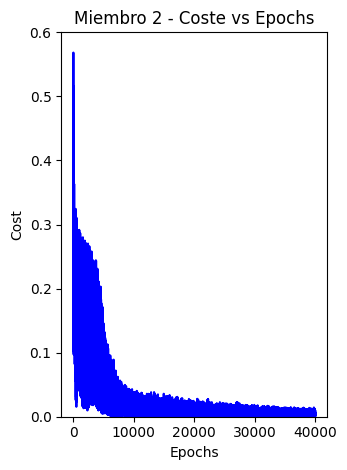


=== PESOS FINALES MIEMBRO 1 ===
LISTADO PESOS DE CONEXIONES
[[ 0.10527955 -0.88381283  0.96617115  1.36155152 -1.27705458 -1.57543191
   0.62596538]
 [ 0.64681136  0.33287196 -0.74991321  0.34926926  0.9592842  -0.38532461
  -2.40290935]
 [ 1.77193389 -0.12962491 -1.17995918 -0.97591714 -0.28787486  0.14767769
   1.60900129]
 [-0.28591386 -0.71139183 -0.17789645  0.37443817 -0.03161856 -0.02846114
  -0.00535342]
 [-0.98921253 -0.64965359 -0.34610212  1.23963824  0.79256277 -0.67326848
   0.42090747]]
[[ 0.35447385  0.23277839  0.82849664 -0.94171477  0.38179386]
 [ 0.0281819  -0.20234892  0.36077432 -0.93354854 -1.70815736]
 [ 0.58966017  0.12733331 -0.98486307  1.33805524 -0.39983801]
 [ 0.31861709 -0.2071429   1.04631829 -1.45558738  0.70226632]
 [-0.96267935 -0.94362159 -1.64321586 -0.43554703  0.08630304]
 [-0.20568451 -1.15557044 -0.26065569 -1.10516468 -1.44461072]
 [ 1.74349284 -1.83698889 -0.80729876  0.46884938  0.21830676]]

=== PESOS FINALES MIEMBRO 2 ===
LISTADO PESOS DE C

In [ ]:
# Red Coche Mejorada
# Lógica diferente: LED se enciende solo con peso, comportamiento más conservador

nn2 = NeuralNetwork([4, 6, 5], activation='tanh')

# Entradas: [Distancia, Posición, Peso, Línea]
X2 = np.array([
    # Casos con línea - comportamiento agresivo
    [-1, 0, -1, 1],    # sin obstaculos, sin peso, con línea -> avanzar rápido
    [-1, 0, 1, 1],     # sin obstaculos, con peso, con línea -> avanzar lento
    [-1, 1, -1, 1],    # sin obstaculos derecha con línea
    [-1, -1, -1, 1],   # sin obstaculos izquierda con línea

    # Casos sin línea - comportamiento cauteloso
    [-1, 0, -1, -1],   # sin obstaculos, sin peso, sin línea -> avanzar
    [-1, 0, 1, -1],    # sin obstaculos, con peso, sin línea -> avanzar lento

    # Obstáculos con línea
    [0, -1, -1, 1],    # obstaculo derecha con línea -> giro brusco
    [0, -1, 1, 1],     # obstaculo derecha con peso y línea -> giro suave
    [0, 1, -1, 1],     # obstaculo izquierda con línea
    [0, 1, 1, 1],      # obstaculo izquierda con peso y línea
    [0, 0, -1, 1],     # obstaculo centro con línea -> retroceder
    [0, 0, 1, 1],      # obstaculo centro con peso y línea -> retroceder lento

    # Situaciones críticas
    [1, 1, -1, 1],     # demasiado cerca derecha con línea -> retroceder rápido
    [1, 1, 1, 1],      # demasiado cerca derecha con peso -> retroceder lento
    [1, 0, -1, -1],    # demasiado cerca centro sin línea -> parar
    [1, 0, 1, -1]      # demasiado cerca centro con peso -> parar con LED
])

# Salidas: [Motor1, Motor2, Motor3, Motor4, LED]
# LED solo se enciende con peso, línea no afecta LED
y2 = np.array([
    [1,0,0,1, 0],  # avanzar rápido, sin LED
    [1,0,0,1, 1],  # avanzar lento, con LED (peso)
    [1,0,0,1, 0],  # avanzar
    [1,0,0,1, 0],  # avanzar

    [1,0,0,1, 0],  # avanzar cauteloso
    [1,0,0,1, 1],  # avanzar lento, con LED

    [0,1,0,1, 0],  # giro derecha brusco
    [0,1,0,1, 1],  # giro derecha suave con LED
    [1,0,1,0, 0],  # giro izquierda
    [1,0,1,0, 1],  # giro izquierda con LED
    [0,1,1,0, 0],  # retroceder
    [0,1,1,0, 1],  # retroceder con LED

    [0,1,1,0, 0],  # retroceder rápido
    [0,1,1,0, 1],  # retroceder lento con LED
    [0,0,0,0, 0],  # parar completamente
    [0,0,0,0, 1]   # parar con LED
])

print("\n=== ENTRENAMIENTO MIEMBRO 2 ===")
nn2.fit(X2, y2, learning_rate=0.03, epochs=40001)

print("\n=== RESULTADOS MIEMBRO 2 ===")
index = 0
for e in X2:
    prediccion = nn2.predict(e)
    print(f"Entrada: {e} -> Esperado: {y2[index]} | Obtenido: {[valNN(p) for p in prediccion]}")
    index += 1

# Gráfica de coste
deltas2 = nn2.get_deltas()
valores2 = []
for arreglo in deltas2:
    valores2.append(np.mean(np.abs(arreglo[1])))

plt.subplot(1, 2, 2)
plt.plot(range(len(valores2)), valores2, color='b')
plt.ylim([0, 0.6])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Miembro 2 - Coste vs Epochs')
plt.tight_layout()
plt.show()

# Mostrar pesos finales
print("\n=== PESOS FINALES MIEMBRO 1 ===")
nn1.print_weights()

print("\n=== PESOS FINALES MIEMBRO 2 ===")
nn2.print_weights()